In [7]:
import numpy as np
import pandas as pd

In [8]:
df = pd.read_csv(r"C:\Users\Earlycode\Documents\joshua\horse.csv")
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [9]:
df.shape

(299, 28)

In [10]:
df.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [11]:
df.isnull().sum() / df.shape[0] * 100

surgery                   0.000000
age                       0.000000
hospital_number           0.000000
rectal_temp              20.066890
pulse                     8.026756
respiratory_rate         19.397993
temp_of_extremities      18.729097
peripheral_pulse         23.076923
mucous_membrane          15.719064
capillary_refill_time    10.702341
pain                     18.394649
peristalsis              14.715719
abdominal_distention     18.729097
nasogastric_tube         34.782609
nasogastric_reflux       35.451505
nasogastric_reflux_ph    82.274247
rectal_exam_feces        34.113712
abdomen                  39.464883
packed_cell_volume        9.698997
total_protein            11.036789
abdomo_appearance        55.183946
abdomo_protein           66.220736
outcome                   0.000000
surgical_lesion           0.000000
lesion_1                  0.000000
lesion_2                  0.000000
lesion_3                  0.000000
cp_data                   0.000000
dtype: float64

In [12]:
from sklearn.impute import SimpleImputer

# Separate categorical and numerical data
cat_data = df.select_dtypes(include = ["object", "category"])
num_data = df.select_dtypes(include = ["int", "float"])

# Create imputers
cat_imputer = SimpleImputer(strategy = "most_frequent")  # Replace with most frequent value
num_imputer = SimpleImputer(strategy = "mean")  # Replace with mean

# Fit and transform data
cat_imp = cat_imputer.fit_transform(cat_data)
num_imp = num_imputer.fit_transform(num_data)

# Convert imputed data back to DataFrames
cat_df = pd.DataFrame(cat_imp, columns = cat_data.columns)
num_df = pd.DataFrame(num_imp, columns = num_data.columns)

# Combine imputed data
df1 = pd.concat([cat_df, num_df], axis = 1)

# Verify imputation
df1.isnull().sum()

surgery                  0
age                      0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
abdomo_appearance        0
outcome                  0
surgical_lesion          0
cp_data                  0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
nasogastric_reflux_ph    0
packed_cell_volume       0
total_protein            0
abdomo_protein           0
lesion_1                 0
lesion_2                 0
lesion_3                 0
dtype: int64

In [13]:
df1.head()

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,...,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
0,no,adult,cool,reduced,normal_pink,more_3_sec,extreme_pain,absent,severe,slight,...,38.5,66.0,28.0,4.707547,45.0,8.4,3.039604,11300.0,0.0,0.0
1,yes,adult,cool,normal,pale_cyanotic,less_3_sec,mild_pain,absent,slight,slight,...,39.2,88.0,20.0,4.707547,50.0,85.0,2.000000,2208.0,0.0,0.0
2,no,adult,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,slight,...,38.3,40.0,24.0,4.707547,33.0,6.7,3.039604,0.0,0.0,0.0
3,yes,young,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,...,39.1,164.0,84.0,5.000000,48.0,7.2,5.300000,2208.0,0.0,0.0
4,no,adult,cool,normal,dark_cyanotic,more_3_sec,mild_pain,hypomotile,none,slight,...,37.3,104.0,35.0,4.707547,74.0,7.4,3.039604,4300.0,0.0,0.0


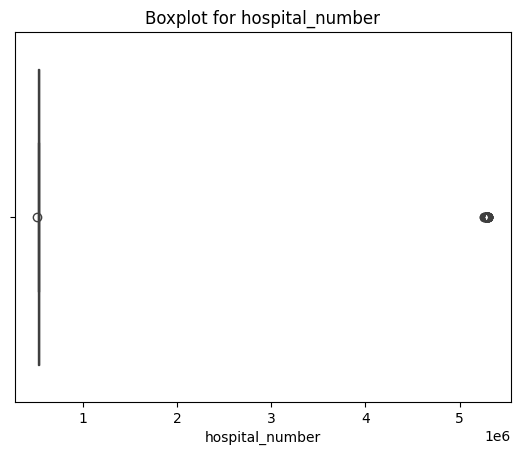

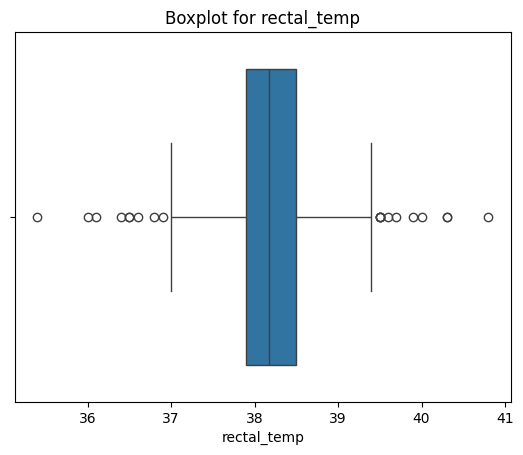

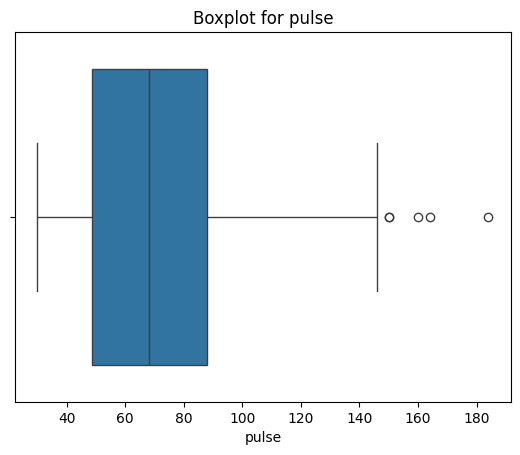

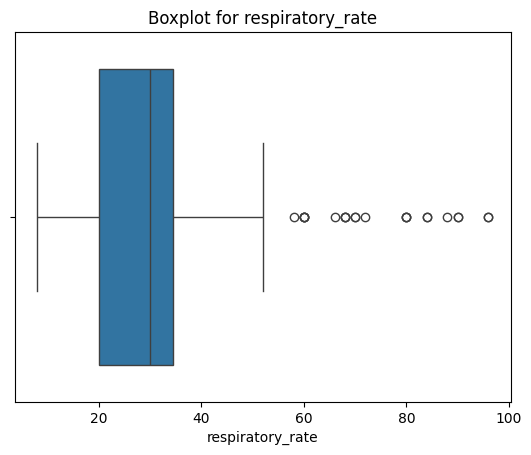

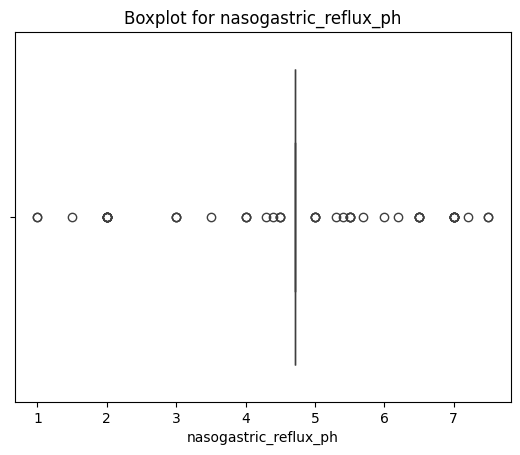

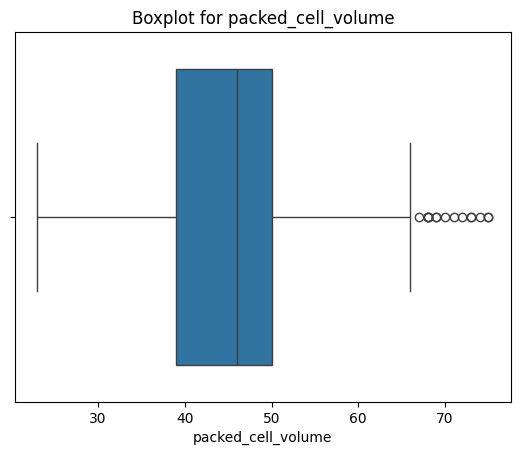

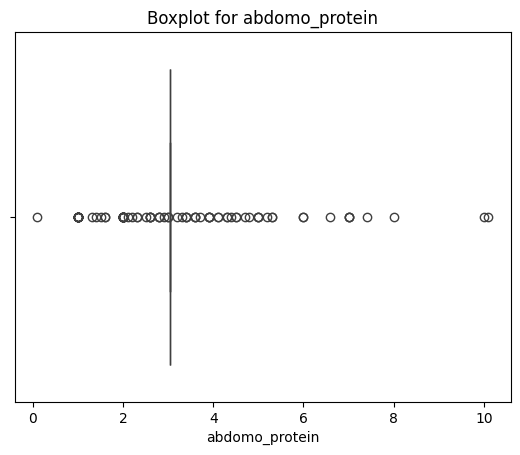

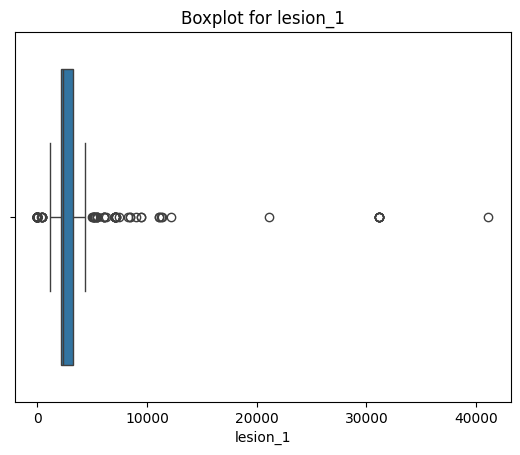

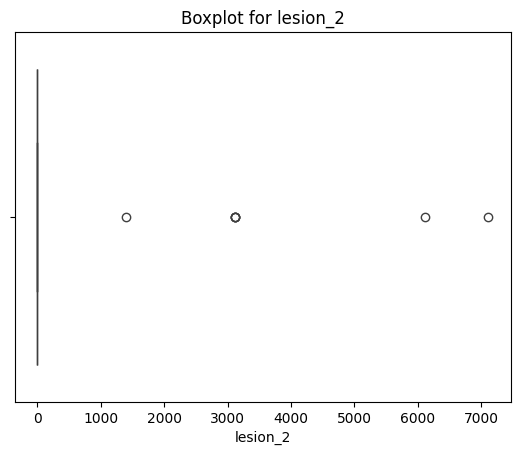

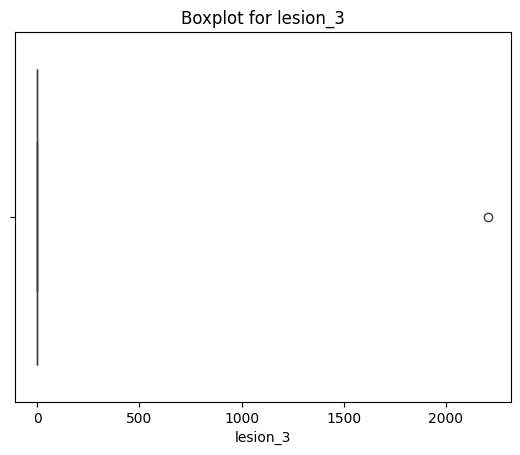

Columns with outliers: ['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3']


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

def detect_outliers(df, column):
    """ Detect outliers using Interquartile Range (IQR) method. """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

def calculate_whiskers(df, column):
    """ Calculate whisker values. """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lw = Q1 - 1.5 * IQR
    uw = Q3 + 1.5 * IQR
    return lw, uw

def winsorize(df, column):
    """ Winsorize data by replacing outliers with whisker values. """
    lw, uw = calculate_whiskers(df, column)
    df[column] = np.where(df[column] < lw, lw, df[column])
    df[column] = np.where(df[column] > uw, uw, df[column])

numerical_columns = df1.select_dtypes(include=["int64", "float64"]).columns
outlier_columns = []

for column in numerical_columns:
    outliers = detect_outliers(df1, column)
    if not outliers.empty:
        outlier_columns.append(column)
        sns.boxplot(data=df1, x=df1[column])
        plt.title(f"Boxplot for {column}")
        plt.show()

print("Columns with outliers:", outlier_columns)

for column in outlier_columns:
    winsorize(df1, column)

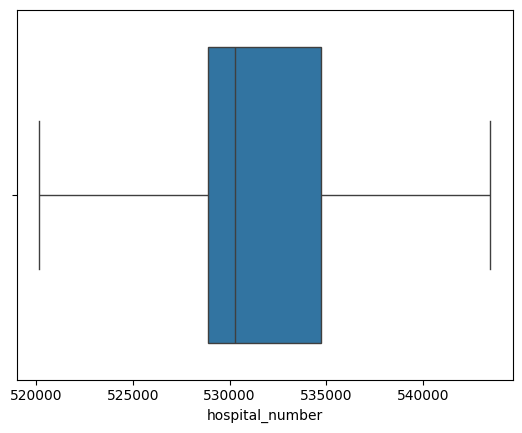

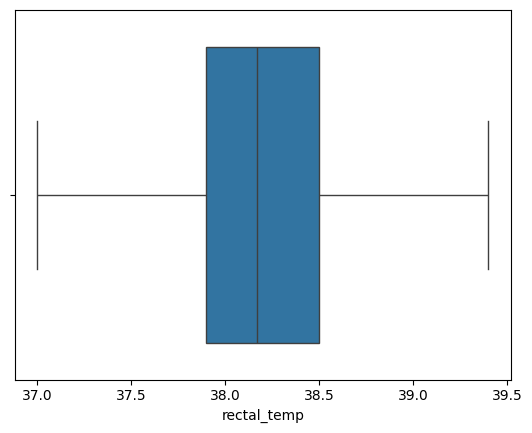

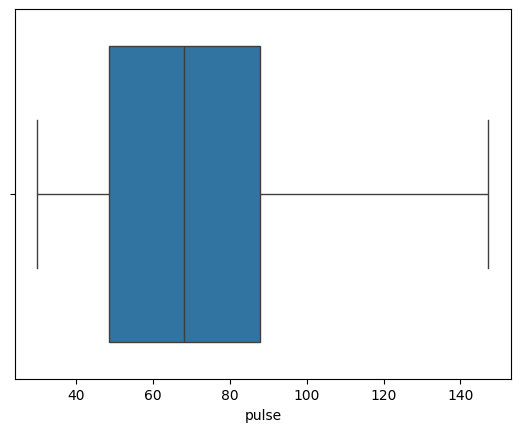

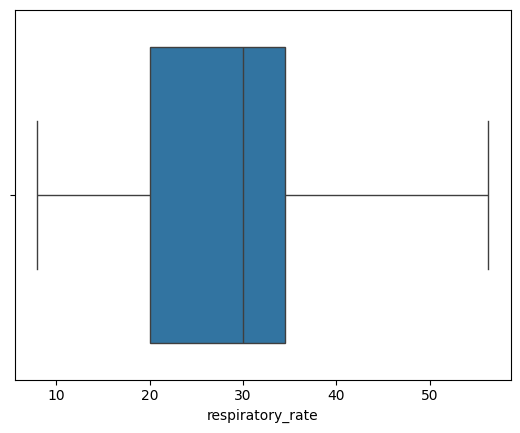

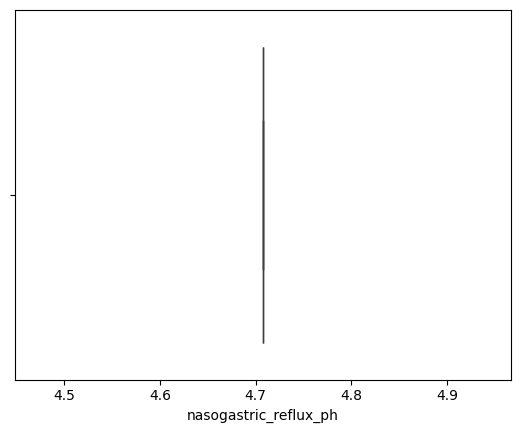

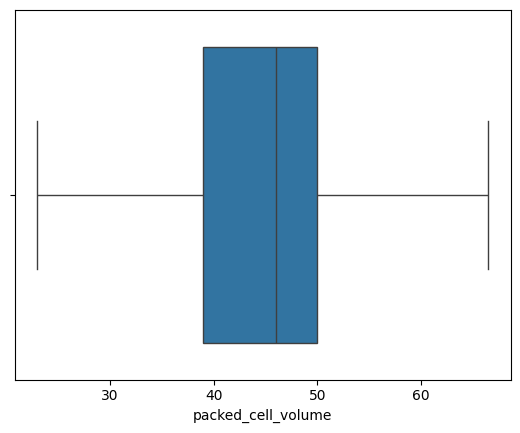

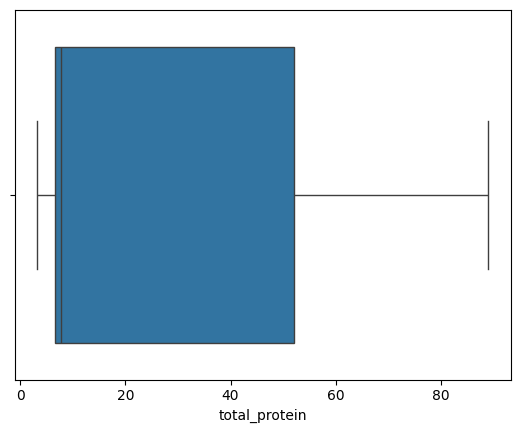

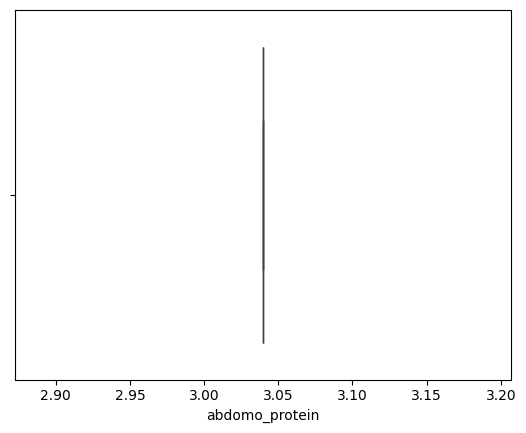

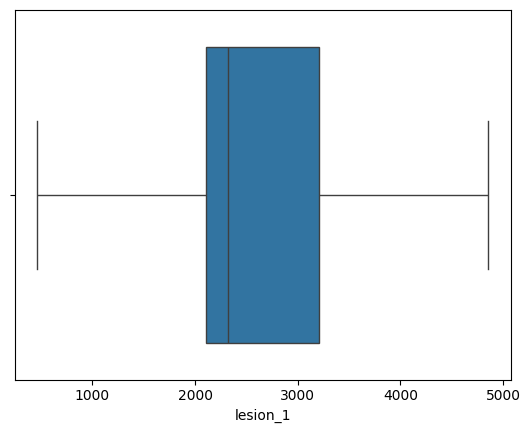

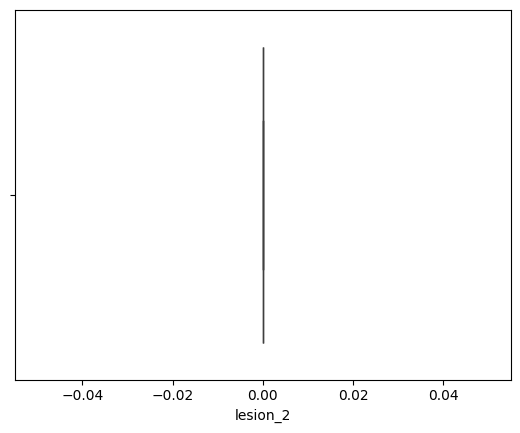

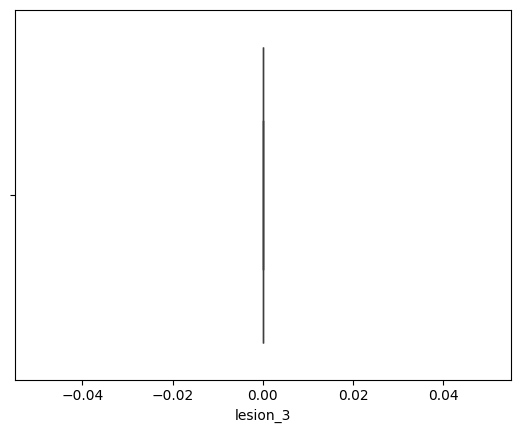

In [15]:
for i in numerical_columns:
    sns.boxplot(data = df1, x = i)
    plt.show()

In [16]:
## Encoding Categorical variable
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
category = df1.select_dtypes(include=["object","category"])
for x in category:
    df1[x] = encoder.fit_transform(df1[x])
df1.head()

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,...,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
0,0,0,1,3,3,2,2,0,2,2,...,38.5,66.00,28.00,4.707547,45.0,8.4,3.039604,4855.25,0.0,0.0
1,1,0,1,2,4,1,3,0,3,2,...,39.2,88.00,20.00,4.707547,50.0,85.0,3.039604,2208.00,0.0,0.0
2,0,0,2,2,5,1,3,2,1,2,...,38.3,40.00,24.00,4.707547,33.0,6.7,3.039604,465.25,0.0,0.0
3,1,1,0,2,2,2,1,0,2,0,...,39.1,147.25,56.25,4.707547,48.0,7.2,3.039604,2208.00,0.0,0.0
4,0,0,1,2,2,2,3,2,1,2,...,37.3,104.00,35.00,4.707547,66.5,7.4,3.039604,4300.00,0.0,0.0


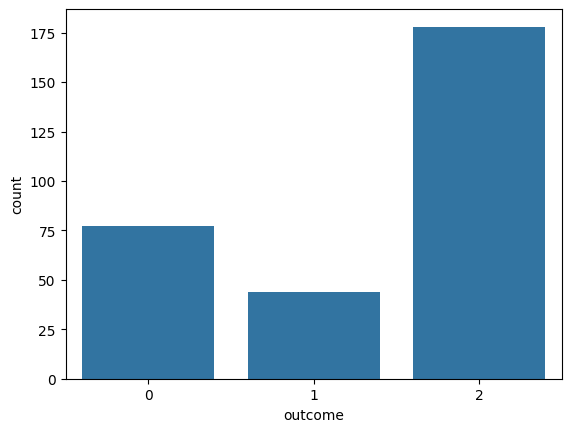

In [17]:
sns.countplot(x = "outcome", data = df1)
plt.show()

In [18]:
from sklearn.utils import resample
df_0 = df1[df1["outcome"] == 0]
df_1 = df1[df1["outcome"] == 1]
df_2 = df1[df1["outcome"] == 2]

df0_sam = resample(df_0, n_samples = 175)
df1_sam = resample(df_1, n_samples = 175)
df2_sam = resample(df_2, n_samples = 175)

df2 = pd.concat([df0_sam, df1_sam, df2_sam])
df2 = df2.sample(frac = 1, ignore_index = True)

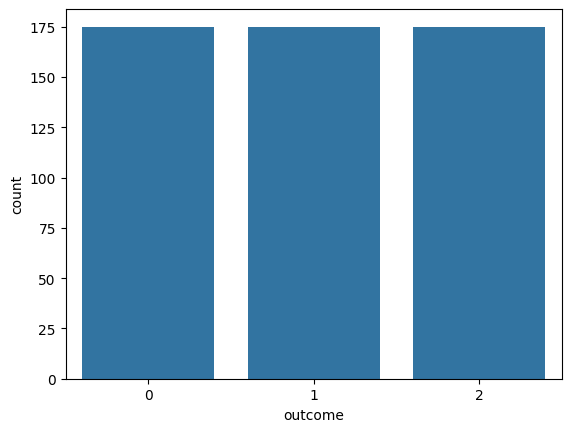

In [19]:
sns.countplot(x = "outcome", data = df2)
plt.show()

In [20]:
df2

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,...,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
0,1,0,1,3,3,1,3,2,3,2,...,37.500000,60.0,50.000000,4.707547,35.000000,6.500000,3.039604,2209.00,0.0,0.0
1,1,0,1,2,5,1,4,0,3,2,...,39.200000,72.0,23.000000,4.707547,36.000000,6.600000,3.039604,3115.00,0.0,0.0
2,1,0,1,3,3,1,0,2,1,2,...,38.200000,40.0,16.000000,4.707547,34.000000,66.000000,3.039604,465.25,0.0,0.0
3,0,0,0,3,4,2,2,0,2,0,...,38.168619,120.0,30.460581,4.707547,60.000000,6.500000,3.039604,3205.00,0.0,0.0
4,1,0,3,2,0,1,3,2,1,2,...,37.800000,88.0,22.000000,4.707547,64.000000,8.000000,3.039604,3205.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,0,0,1,0,5,1,4,0,2,2,...,38.168619,80.0,36.000000,4.707547,38.000000,6.200000,3.039604,3205.00,0.0,0.0
521,0,0,0,3,4,2,1,0,2,0,...,38.200000,130.0,16.000000,4.707547,65.000000,82.000000,3.039604,2209.00,0.0,0.0
522,1,0,0,0,3,2,2,0,1,2,...,39.200000,88.0,56.250000,4.707547,46.307407,24.274436,3.039604,3205.00,0.0,0.0
523,1,0,1,2,3,1,3,2,1,2,...,38.400000,49.0,30.460581,4.707547,44.000000,7.600000,3.039604,2206.00,0.0,0.0


In [21]:
print(df1.shape)
print(df2.shape)

(299, 28)
(525, 28)


In [22]:
## Split the dataset into Independent and Dependent Variable
features = df2.drop(["outcome"], axis = 1)
target = df2["outcome"]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier

models = {
  "KNN": KNeighborsClassifier(),
  "Decision Tree": DecisionTreeClassifier(),
  "Random Forest": RandomForestClassifier()
}

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score

# Initialize classifier
gbc = GradientBoostingClassifier(max_depth=5)

# Train on original data
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

original_f1 = round(f1_score(y_test, y_pred, average="weighted"), 2)
print(f"Original F1 Score: {original_f1}")

Original F1 Score: 0.93


In [26]:
# Scale data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train on scaled data
gbc.fit(X_train_scaled, y_train)
y_pred_scaled = gbc.predict(X_test_scaled)
scaled_f1 = round(f1_score(y_test, y_pred_scaled, average="weighted"), 2)
print(f"Scaled F1 Score: {scaled_f1}")

Scaled F1 Score: 0.93


In [27]:
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

f1_score_list = []

for k in range(1, 28):
    selector = SelectKBest(mutual_info_classif, k=k)
    selector.fit(X_train_v2, y_train_v2)
    
    sel_X_train_v2 = selector.transform(X_train_v2)
    sel_X_test_v2 = selector.transform(X_test_v2)
    
    gbc.fit(sel_X_train_v2, y_train_v2)
    kbest_preds = gbc.predict(sel_X_test_v2)
    
    f1_score_kbest = round(f1_score(y_test_v2, kbest_preds, average='weighted'), 2)
    
    f1_score_list.append(f1_score_kbest)

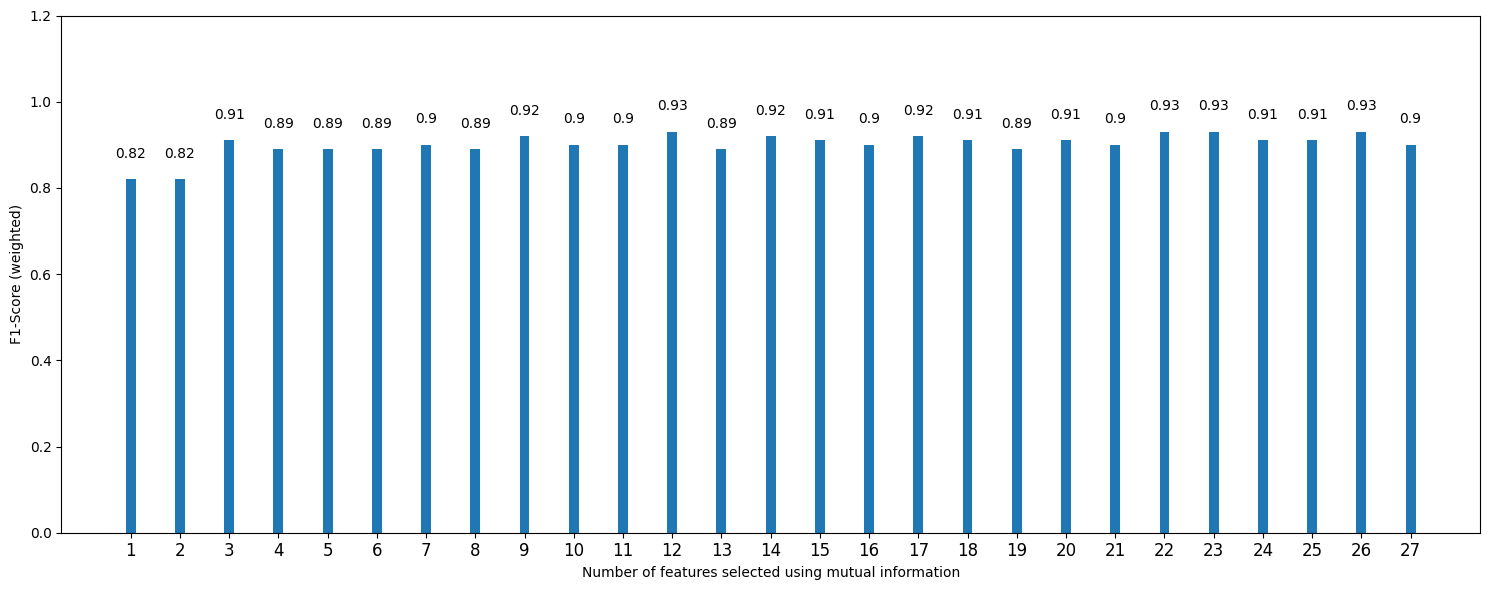

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (15, 6))  # Set figure size (width, height)

x = np.arange(1, 28)
y = f1_score_list

ax.bar(x, y, width=0.2)
ax.set_xlabel("Number of features selected using mutual information")
ax.set_ylabel("F1-Score (weighted)")
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(1, 28))
ax.set_xticklabels(np.arange(1, 28), fontsize = 12)

for i, v in enumerate(y):
    plt.text(x = i + 1, y = v + 0.05, s = str(v), ha = "center")

plt.tight_layout()
plt.show()

In [34]:
selector = SelectKBest(mutual_info_classif, k = 12)
selector.fit(X_train_v2, y_train_v2)

selected_feature_mask = selector.get_support()

selected_features = X_train_v2.columns[selected_feature_mask]

selected_features

Index(['peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain',
       'peristalsis', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'packed_cell_volume', 'total_protein', 'lesion_1'],
      dtype='object')